## Part 1: Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
# load data, data taken from https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
full_data = pd.read_csv('dataset.csv')
full_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# parameters names and types
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
# search for nul values
full_data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
# search for duplicates
full_data.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)
full_data.duplicated().sum()

450

We have plenty of entries, removing all duplicate and null entries is okay.

In [6]:
# remove duplicates and null rows
full_data.dropna(inplace=True)
full_data.drop_duplicates(inplace=True)

In [7]:
# removing unwanted columns
full_data.drop(columns=['track_id','artists','album_name','track_name'], inplace=True)
full_data.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
# types of genres
full_data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [9]:
# encode 'explicit' and 'track genre' columns
from sklearn.preprocessing import LabelEncoder
full_data['explicit'] = LabelEncoder().fit_transform(full_data['explicit'])
full_data['track_genre'] = LabelEncoder().fit_transform(full_data['track_genre'])
full_data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [10]:
from sklearn.model_selection import train_test_split
# divide label from data
X = full_data.drop(columns = ['track_genre'])
y = full_data.loc[:,'track_genre']
# one-hot encode y
from sklearn.preprocessing import OneHotEncoder
y = np.array(y).reshape(-1, 1)
y = OneHotEncoder(sparse = False).fit_transform(y)

X.shape

(113549, 15)

In [11]:

# train test split with shuffle
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# split validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_val.shape

(18168, 15)

In [13]:
# scaling the data to fit between [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# treat train set as all the knowledge we have and transform validation and test according to it
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train.max() # new maximal value

1.0

Data is now ready for learning

## Part 2: Dropout
In the previous project we used Softmax and MLP to try and learn the data.
We managed to do so to a certain success, with 0.26 being the highest accuracy we managed to accomplish.

This time we will use more advanced models, such as Dropout
https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(2)

### Replicate MLP from Ex1
Same network as in exercise 1, but in TensorFlow 2

In [15]:
model = keras.Sequential()
# first hidden layer is a dense layer
model.add(layers.Dense(100, input_shape=(15,), activation='relu'))
# second hidden layer is also dense
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(150, activation='relu'))
# last layer is the softmax layer for classification
model.add(layers.Dense(114, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 114)               17214     
Total params: 79,264
Trainable params: 79,264
Non-trainable params: 0
_________________________________________________________________


In [16]:
checkpoint_path = "dnn1_training/cp.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [17]:
# Compile and train the model.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train,
                  y_train,
                  epochs=1000, 
                  batch_size=10000, 
                  validation_data=(X_val, y_val))

Epoch 1/1000
8/8 [==============================] - ETA: 0s - loss: 4.7236 - accuracy: 0.02 - 1s 67ms/step - loss: 4.7228 - accuracy: 0.0220 - val_loss: 4.6974 - val_accuracy: 0.0351
Epoch 2/1000
8/8 [==============================] - 0s 46ms/step - loss: 4.6688 - accuracy: 0.0386 - val_loss: 4.6077 - val_accuracy: 0.0468
Epoch 3/1000
8/8 [==============================] - 0s 48ms/step - loss: 4.5383 - accuracy: 0.0519 - val_loss: 4.4010 - val_accuracy: 0.0558
Epoch 4/1000
8/8 [==============================] - 0s 48ms/step - loss: 4.2932 - accuracy: 0.0640 - val_loss: 4.1324 - val_accuracy: 0.0813
Epoch 5/1000
8/8 [==============================] - 0s 45ms/step - loss: 4.0656 - accuracy: 0.0899 - val_loss: 3.9748 - val_accuracy: 0.1065
Epoch 6/1000
8/8 [==============================] - 0s 46ms/step - loss: 3.9334 - accuracy: 0.1063 - val_loss: 3.8601 - val_accuracy: 0.1162
Epoch 7/1000
8/8 [==============================] - 0s 47ms/step - loss: 3.8343 - accuracy: 0.1200 - val_loss: 3

8/8 [==============================] - 1s 66ms/step - loss: 2.9323 - accuracy: 0.2488 - val_loss: 2.9628 - val_accuracy: 0.2456
Epoch 59/1000
8/8 [==============================] - 1s 66ms/step - loss: 2.9288 - accuracy: 0.2485 - val_loss: 2.9521 - val_accuracy: 0.2475
Epoch 60/1000
8/8 [==============================] - 1s 67ms/step - loss: 2.9230 - accuracy: 0.2498 - val_loss: 2.9552 - val_accuracy: 0.2452
Epoch 61/1000
8/8 [==============================] - 1s 70ms/step - loss: 2.9174 - accuracy: 0.2506 - val_loss: 2.9460 - val_accuracy: 0.2487
Epoch 62/1000
8/8 [==============================] - 1s 64ms/step - loss: 2.9110 - accuracy: 0.2515 - val_loss: 2.9392 - val_accuracy: 0.2496
Epoch 63/1000
8/8 [==============================] - 1s 66ms/step - loss: 2.9053 - accuracy: 0.2516 - val_loss: 2.9349 - val_accuracy: 0.2472
Epoch 64/1000
8/8 [==============================] - 1s 67ms/step - loss: 2.9009 - accuracy: 0.2538 - val_loss: 2.9322 - val_accuracy: 0.2513
Epoch 65/1000
8/8 [=

8/8 [==============================] - 1s 74ms/step - loss: 2.7625 - accuracy: 0.2786 - val_loss: 2.8063 - val_accuracy: 0.2777
Epoch 116/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.7592 - accuracy: 0.2776 - val_loss: 2.8070 - val_accuracy: 0.2730
Epoch 117/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.7538 - accuracy: 0.2788 - val_loss: 2.8080 - val_accuracy: 0.2754
Epoch 118/1000
8/8 [==============================] - 1s 92ms/step - loss: 2.7546 - accuracy: 0.2789 - val_loss: 2.8021 - val_accuracy: 0.2715
Epoch 119/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.7515 - accuracy: 0.2800 - val_loss: 2.8009 - val_accuracy: 0.2732
Epoch 120/1000
8/8 [==============================] - 1s 82ms/step - loss: 2.7498 - accuracy: 0.2802 - val_loss: 2.8022 - val_accuracy: 0.2760
Epoch 121/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.7515 - accuracy: 0.2789 - val_loss: 2.8029 - val_accuracy: 0.2717
Epoch 122/1000

8/8 [==============================] - 1s 75ms/step - loss: 2.6778 - accuracy: 0.2949 - val_loss: 2.7471 - val_accuracy: 0.2857
Epoch 173/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.6779 - accuracy: 0.2946 - val_loss: 2.7464 - val_accuracy: 0.2858
Epoch 174/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.6745 - accuracy: 0.2969 - val_loss: 2.7440 - val_accuracy: 0.2873
Epoch 175/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.6727 - accuracy: 0.2966 - val_loss: 2.7471 - val_accuracy: 0.2887
Epoch 176/1000
8/8 [==============================] - 1s 73ms/step - loss: 2.6735 - accuracy: 0.2957 - val_loss: 2.7413 - val_accuracy: 0.2869
Epoch 177/1000
8/8 [==============================] - 1s 72ms/step - loss: 2.6719 - accuracy: 0.2949 - val_loss: 2.7446 - val_accuracy: 0.2856
Epoch 178/1000
8/8 [==============================] - 1s 73ms/step - loss: 2.6723 - accuracy: 0.2958 - val_loss: 2.7458 - val_accuracy: 0.2875
Epoch 179/1000

8/8 [==============================] - 1s 69ms/step - loss: 2.6272 - accuracy: 0.3044 - val_loss: 2.7170 - val_accuracy: 0.2910
Epoch 230/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.6269 - accuracy: 0.3030 - val_loss: 2.7120 - val_accuracy: 0.2925
Epoch 231/1000
8/8 [==============================] - 1s 71ms/step - loss: 2.6244 - accuracy: 0.3046 - val_loss: 2.7057 - val_accuracy: 0.2952
Epoch 232/1000
8/8 [==============================] - 1s 70ms/step - loss: 2.6216 - accuracy: 0.3050 - val_loss: 2.7048 - val_accuracy: 0.2957
Epoch 233/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.6207 - accuracy: 0.3046 - val_loss: 2.7194 - val_accuracy: 0.2919
Epoch 234/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.6246 - accuracy: 0.3040 - val_loss: 2.7086 - val_accuracy: 0.2929
Epoch 235/1000
8/8 [==============================] - 1s 71ms/step - loss: 2.6254 - accuracy: 0.3055 - val_loss: 2.7151 - val_accuracy: 0.2922
Epoch 236/1000

8/8 [==============================] - 1s 71ms/step - loss: 2.5870 - accuracy: 0.3105 - val_loss: 2.6810 - val_accuracy: 0.2984
Epoch 287/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.5827 - accuracy: 0.3123 - val_loss: 2.6850 - val_accuracy: 0.2971
Epoch 288/1000
8/8 [==============================] - 1s 71ms/step - loss: 2.5837 - accuracy: 0.3121 - val_loss: 2.6855 - val_accuracy: 0.3018
Epoch 289/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.5824 - accuracy: 0.3125 - val_loss: 2.6841 - val_accuracy: 0.2994
Epoch 290/1000
8/8 [==============================] - 1s 67ms/step - loss: 2.5813 - accuracy: 0.3130 - val_loss: 2.6779 - val_accuracy: 0.2985
Epoch 291/1000
8/8 [==============================] - 1s 72ms/step - loss: 2.5799 - accuracy: 0.3125 - val_loss: 2.6784 - val_accuracy: 0.3018
Epoch 292/1000
8/8 [==============================] - 1s 71ms/step - loss: 2.5795 - accuracy: 0.3129 - val_loss: 2.6807 - val_accuracy: 0.3004
Epoch 293/1000

8/8 [==============================] - 1s 71ms/step - loss: 2.5517 - accuracy: 0.3194 - val_loss: 2.6667 - val_accuracy: 0.3036
Epoch 344/1000
8/8 [==============================] - 1s 72ms/step - loss: 2.5528 - accuracy: 0.3177 - val_loss: 2.6671 - val_accuracy: 0.3031
Epoch 345/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.5510 - accuracy: 0.3175 - val_loss: 2.6584 - val_accuracy: 0.3055
Epoch 346/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.5476 - accuracy: 0.3184 - val_loss: 2.6612 - val_accuracy: 0.3048
Epoch 347/1000
8/8 [==============================] - 1s 82ms/step - loss: 2.5463 - accuracy: 0.3184 - val_loss: 2.6632 - val_accuracy: 0.3049
Epoch 348/1000
8/8 [==============================] - 1s 73ms/step - loss: 2.5502 - accuracy: 0.3190 - val_loss: 2.6600 - val_accuracy: 0.3038
Epoch 349/1000
8/8 [==============================] - 1s 68ms/step - loss: 2.5473 - accuracy: 0.3191 - val_loss: 2.6581 - val_accuracy: 0.3054
Epoch 350/1000

8/8 [==============================] - 1s 91ms/step - loss: 2.5202 - accuracy: 0.3246 - val_loss: 2.6422 - val_accuracy: 0.3088
Epoch 401/1000
8/8 [==============================] - 1s 107ms/step - loss: 2.5218 - accuracy: 0.3235 - val_loss: 2.6448 - val_accuracy: 0.3052
Epoch 402/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.5199 - accuracy: 0.3251 - val_loss: 2.6498 - val_accuracy: 0.3051
Epoch 403/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.5236 - accuracy: 0.3229 - val_loss: 2.6412 - val_accuracy: 0.3087
Epoch 404/1000
8/8 [==============================] - 1s 77ms/step - loss: 2.5200 - accuracy: 0.3240 - val_loss: 2.6505 - val_accuracy: 0.3054
Epoch 405/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.5227 - accuracy: 0.3237 - val_loss: 2.6548 - val_accuracy: 0.3062
Epoch 406/1000
8/8 [==============================] - 1s 71ms/step - loss: 2.5255 - accuracy: 0.3231 - val_loss: 2.6472 - val_accuracy: 0.3080
Epoch 407/100

8/8 [==============================] - 1s 76ms/step - loss: 2.4954 - accuracy: 0.3293 - val_loss: 2.6303 - val_accuracy: 0.3115
Epoch 458/1000
8/8 [==============================] - 1s 73ms/step - loss: 2.4949 - accuracy: 0.3295 - val_loss: 2.6340 - val_accuracy: 0.3091
Epoch 459/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.4942 - accuracy: 0.3294 - val_loss: 2.6354 - val_accuracy: 0.3077
Epoch 460/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4961 - accuracy: 0.3292 - val_loss: 2.6289 - val_accuracy: 0.3111
Epoch 461/1000
8/8 [==============================] - 1s 77ms/step - loss: 2.4965 - accuracy: 0.3285 - val_loss: 2.6426 - val_accuracy: 0.3071
Epoch 462/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4965 - accuracy: 0.3293 - val_loss: 2.6327 - val_accuracy: 0.3091
Epoch 463/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4936 - accuracy: 0.3292 - val_loss: 2.6339 - val_accuracy: 0.3090
Epoch 464/1000

8/8 [==============================] - 1s 93ms/step - loss: 2.4734 - accuracy: 0.3336 - val_loss: 2.6250 - val_accuracy: 0.3113
Epoch 515/1000
8/8 [==============================] - 1s 93ms/step - loss: 2.4755 - accuracy: 0.3316 - val_loss: 2.6204 - val_accuracy: 0.3111
Epoch 516/1000
8/8 [==============================] - 1s 90ms/step - loss: 2.4739 - accuracy: 0.3339 - val_loss: 2.6231 - val_accuracy: 0.3111
Epoch 517/1000
8/8 [==============================] - 1s 82ms/step - loss: 2.4749 - accuracy: 0.3315 - val_loss: 2.6223 - val_accuracy: 0.3136
Epoch 518/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4730 - accuracy: 0.3330 - val_loss: 2.6224 - val_accuracy: 0.3120
Epoch 519/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.4744 - accuracy: 0.3342 - val_loss: 2.6224 - val_accuracy: 0.3119
Epoch 520/1000
8/8 [==============================] - 1s 77ms/step - loss: 2.4744 - accuracy: 0.3335 - val_loss: 2.6241 - val_accuracy: 0.3120
Epoch 521/1000

8/8 [==============================] - 1s 83ms/step - loss: 2.4540 - accuracy: 0.3380 - val_loss: 2.6200 - val_accuracy: 0.3124
Epoch 572/1000
8/8 [==============================] - 1s 85ms/step - loss: 2.4571 - accuracy: 0.3352 - val_loss: 2.6125 - val_accuracy: 0.3127
Epoch 573/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.4555 - accuracy: 0.3359 - val_loss: 2.6107 - val_accuracy: 0.3131
Epoch 574/1000
8/8 [==============================] - 1s 89ms/step - loss: 2.4561 - accuracy: 0.3363 - val_loss: 2.6162 - val_accuracy: 0.3143
Epoch 575/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4529 - accuracy: 0.3373 - val_loss: 2.6135 - val_accuracy: 0.3153
Epoch 576/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4535 - accuracy: 0.3360 - val_loss: 2.6112 - val_accuracy: 0.3137
Epoch 577/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4541 - accuracy: 0.3376 - val_loss: 2.6122 - val_accuracy: 0.3136
Epoch 578/1000

8/8 [==============================] - 1s 81ms/step - loss: 2.4386 - accuracy: 0.3403 - val_loss: 2.6040 - val_accuracy: 0.3151
Epoch 629/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.4350 - accuracy: 0.3406 - val_loss: 2.6085 - val_accuracy: 0.3150
Epoch 630/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.4396 - accuracy: 0.3391 - val_loss: 2.6161 - val_accuracy: 0.3128
Epoch 631/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.4396 - accuracy: 0.3399 - val_loss: 2.6055 - val_accuracy: 0.3151
Epoch 632/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.4350 - accuracy: 0.3403 - val_loss: 2.6061 - val_accuracy: 0.3167
Epoch 633/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4383 - accuracy: 0.3392 - val_loss: 2.6209 - val_accuracy: 0.3109
Epoch 634/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4390 - accuracy: 0.3397 - val_loss: 2.6037 - val_accuracy: 0.3160
Epoch 635/1000

8/8 [==============================] - 1s 91ms/step - loss: 2.4193 - accuracy: 0.3435 - val_loss: 2.5982 - val_accuracy: 0.3171
Epoch 686/1000
8/8 [==============================] - 1s 97ms/step - loss: 2.4198 - accuracy: 0.3435 - val_loss: 2.5962 - val_accuracy: 0.3166
Epoch 687/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4193 - accuracy: 0.3428 - val_loss: 2.5981 - val_accuracy: 0.3162
Epoch 688/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4196 - accuracy: 0.3433 - val_loss: 2.5924 - val_accuracy: 0.3158
Epoch 689/1000
8/8 [==============================] - 1s 99ms/step - loss: 2.4143 - accuracy: 0.3443 - val_loss: 2.5965 - val_accuracy: 0.3160
Epoch 690/1000
8/8 [==============================] - 1s 90ms/step - loss: 2.4134 - accuracy: 0.3444 - val_loss: 2.5954 - val_accuracy: 0.3179
Epoch 691/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.4120 - accuracy: 0.3467 - val_loss: 2.5936 - val_accuracy: 0.3157
Epoch 692/1000

8/8 [==============================] - 1s 85ms/step - loss: 2.3987 - accuracy: 0.3476 - val_loss: 2.5910 - val_accuracy: 0.3198
Epoch 743/1000
8/8 [==============================] - 1s 82ms/step - loss: 2.3991 - accuracy: 0.3469 - val_loss: 2.5991 - val_accuracy: 0.3174
Epoch 744/1000
8/8 [==============================] - 1s 91ms/step - loss: 2.4039 - accuracy: 0.3460 - val_loss: 2.5860 - val_accuracy: 0.3202
Epoch 745/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.3997 - accuracy: 0.3485 - val_loss: 2.5958 - val_accuracy: 0.3151
Epoch 746/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.3986 - accuracy: 0.3476 - val_loss: 2.5865 - val_accuracy: 0.3189
Epoch 747/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.3967 - accuracy: 0.3484 - val_loss: 2.5888 - val_accuracy: 0.3172
Epoch 748/1000
8/8 [==============================] - 1s 89ms/step - loss: 2.3968 - accuracy: 0.3462 - val_loss: 2.5959 - val_accuracy: 0.3185
Epoch 749/1000

8/8 [==============================] - 1s 80ms/step - loss: 2.3822 - accuracy: 0.3511 - val_loss: 2.5859 - val_accuracy: 0.3181
Epoch 800/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.3810 - accuracy: 0.3514 - val_loss: 2.5801 - val_accuracy: 0.3194
Epoch 801/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.3798 - accuracy: 0.3512 - val_loss: 2.5807 - val_accuracy: 0.3204
Epoch 802/1000
8/8 [==============================] - 1s 87ms/step - loss: 2.3795 - accuracy: 0.3515 - val_loss: 2.5832 - val_accuracy: 0.3196
Epoch 803/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.3809 - accuracy: 0.3507 - val_loss: 2.5783 - val_accuracy: 0.3198
Epoch 804/1000
8/8 [==============================] - 1s 77ms/step - loss: 2.3803 - accuracy: 0.3511 - val_loss: 2.5796 - val_accuracy: 0.3202
Epoch 805/1000
8/8 [==============================] - 1s 94ms/step - loss: 2.3785 - accuracy: 0.3515 - val_loss: 2.5824 - val_accuracy: 0.3197
Epoch 806/1000

8/8 [==============================] - 1s 71ms/step - loss: 2.3645 - accuracy: 0.3545 - val_loss: 2.5759 - val_accuracy: 0.3203
Epoch 857/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.3639 - accuracy: 0.3542 - val_loss: 2.5748 - val_accuracy: 0.3233
Epoch 858/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.3664 - accuracy: 0.3532 - val_loss: 2.5738 - val_accuracy: 0.3196
Epoch 859/1000
8/8 [==============================] - 1s 71ms/step - loss: 2.3641 - accuracy: 0.3538 - val_loss: 2.5700 - val_accuracy: 0.3235
Epoch 860/1000
8/8 [==============================] - 1s 69ms/step - loss: 2.3601 - accuracy: 0.3544 - val_loss: 2.5768 - val_accuracy: 0.3228
Epoch 861/1000
8/8 [==============================] - 1s 73ms/step - loss: 2.3625 - accuracy: 0.3528 - val_loss: 2.5767 - val_accuracy: 0.3209
Epoch 862/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.3628 - accuracy: 0.3541 - val_loss: 2.5739 - val_accuracy: 0.3217
Epoch 863/1000

8/8 [==============================] - 1s 75ms/step - loss: 2.3515 - accuracy: 0.3555 - val_loss: 2.5757 - val_accuracy: 0.3254
Epoch 914/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.3487 - accuracy: 0.3571 - val_loss: 2.5675 - val_accuracy: 0.3216
Epoch 915/1000
8/8 [==============================] - 1s 68ms/step - loss: 2.3511 - accuracy: 0.3558 - val_loss: 2.5728 - val_accuracy: 0.3239
Epoch 916/1000
8/8 [==============================] - 1s 71ms/step - loss: 2.3544 - accuracy: 0.3561 - val_loss: 2.5896 - val_accuracy: 0.3207
Epoch 917/1000
8/8 [==============================] - 1s 91ms/step - loss: 2.3561 - accuracy: 0.3554 - val_loss: 2.5768 - val_accuracy: 0.3194
Epoch 918/1000
8/8 [==============================] - 1s 99ms/step - loss: 2.3496 - accuracy: 0.3559 - val_loss: 2.5722 - val_accuracy: 0.3232
Epoch 919/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.3474 - accuracy: 0.3579 - val_loss: 2.5682 - val_accuracy: 0.3240
Epoch 920/1000

8/8 [==============================] - 1s 77ms/step - loss: 2.3320 - accuracy: 0.3614 - val_loss: 2.5653 - val_accuracy: 0.3236
Epoch 971/1000
8/8 [==============================] - 1s 70ms/step - loss: 2.3299 - accuracy: 0.3605 - val_loss: 2.5684 - val_accuracy: 0.3229
Epoch 972/1000
8/8 [==============================] - 1s 72ms/step - loss: 2.3319 - accuracy: 0.3605 - val_loss: 2.5629 - val_accuracy: 0.3265
Epoch 973/1000
8/8 [==============================] - 1s 87ms/step - loss: 2.3316 - accuracy: 0.3589 - val_loss: 2.5677 - val_accuracy: 0.3236
Epoch 974/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.3337 - accuracy: 0.3596 - val_loss: 2.5653 - val_accuracy: 0.3249
Epoch 975/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.3320 - accuracy: 0.3607 - val_loss: 2.5694 - val_accuracy: 0.3220
Epoch 976/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.3325 - accuracy: 0.3592 - val_loss: 2.5688 - val_accuracy: 0.3216
Epoch 977/1000

plot learning curves

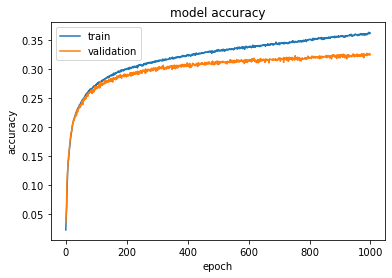

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

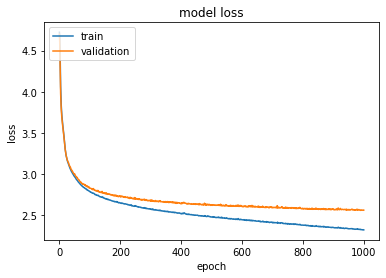

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Test accuracy

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_accuracy)

710/710 [==============================] - 1s 1ms/step - loss: 2.5891 - accuracy: 0.3173
test loss: 2.5890579223632812
test accuracy: 0.31726112961769104


In [21]:
#predictions
y_pred = model.predict(X_test)

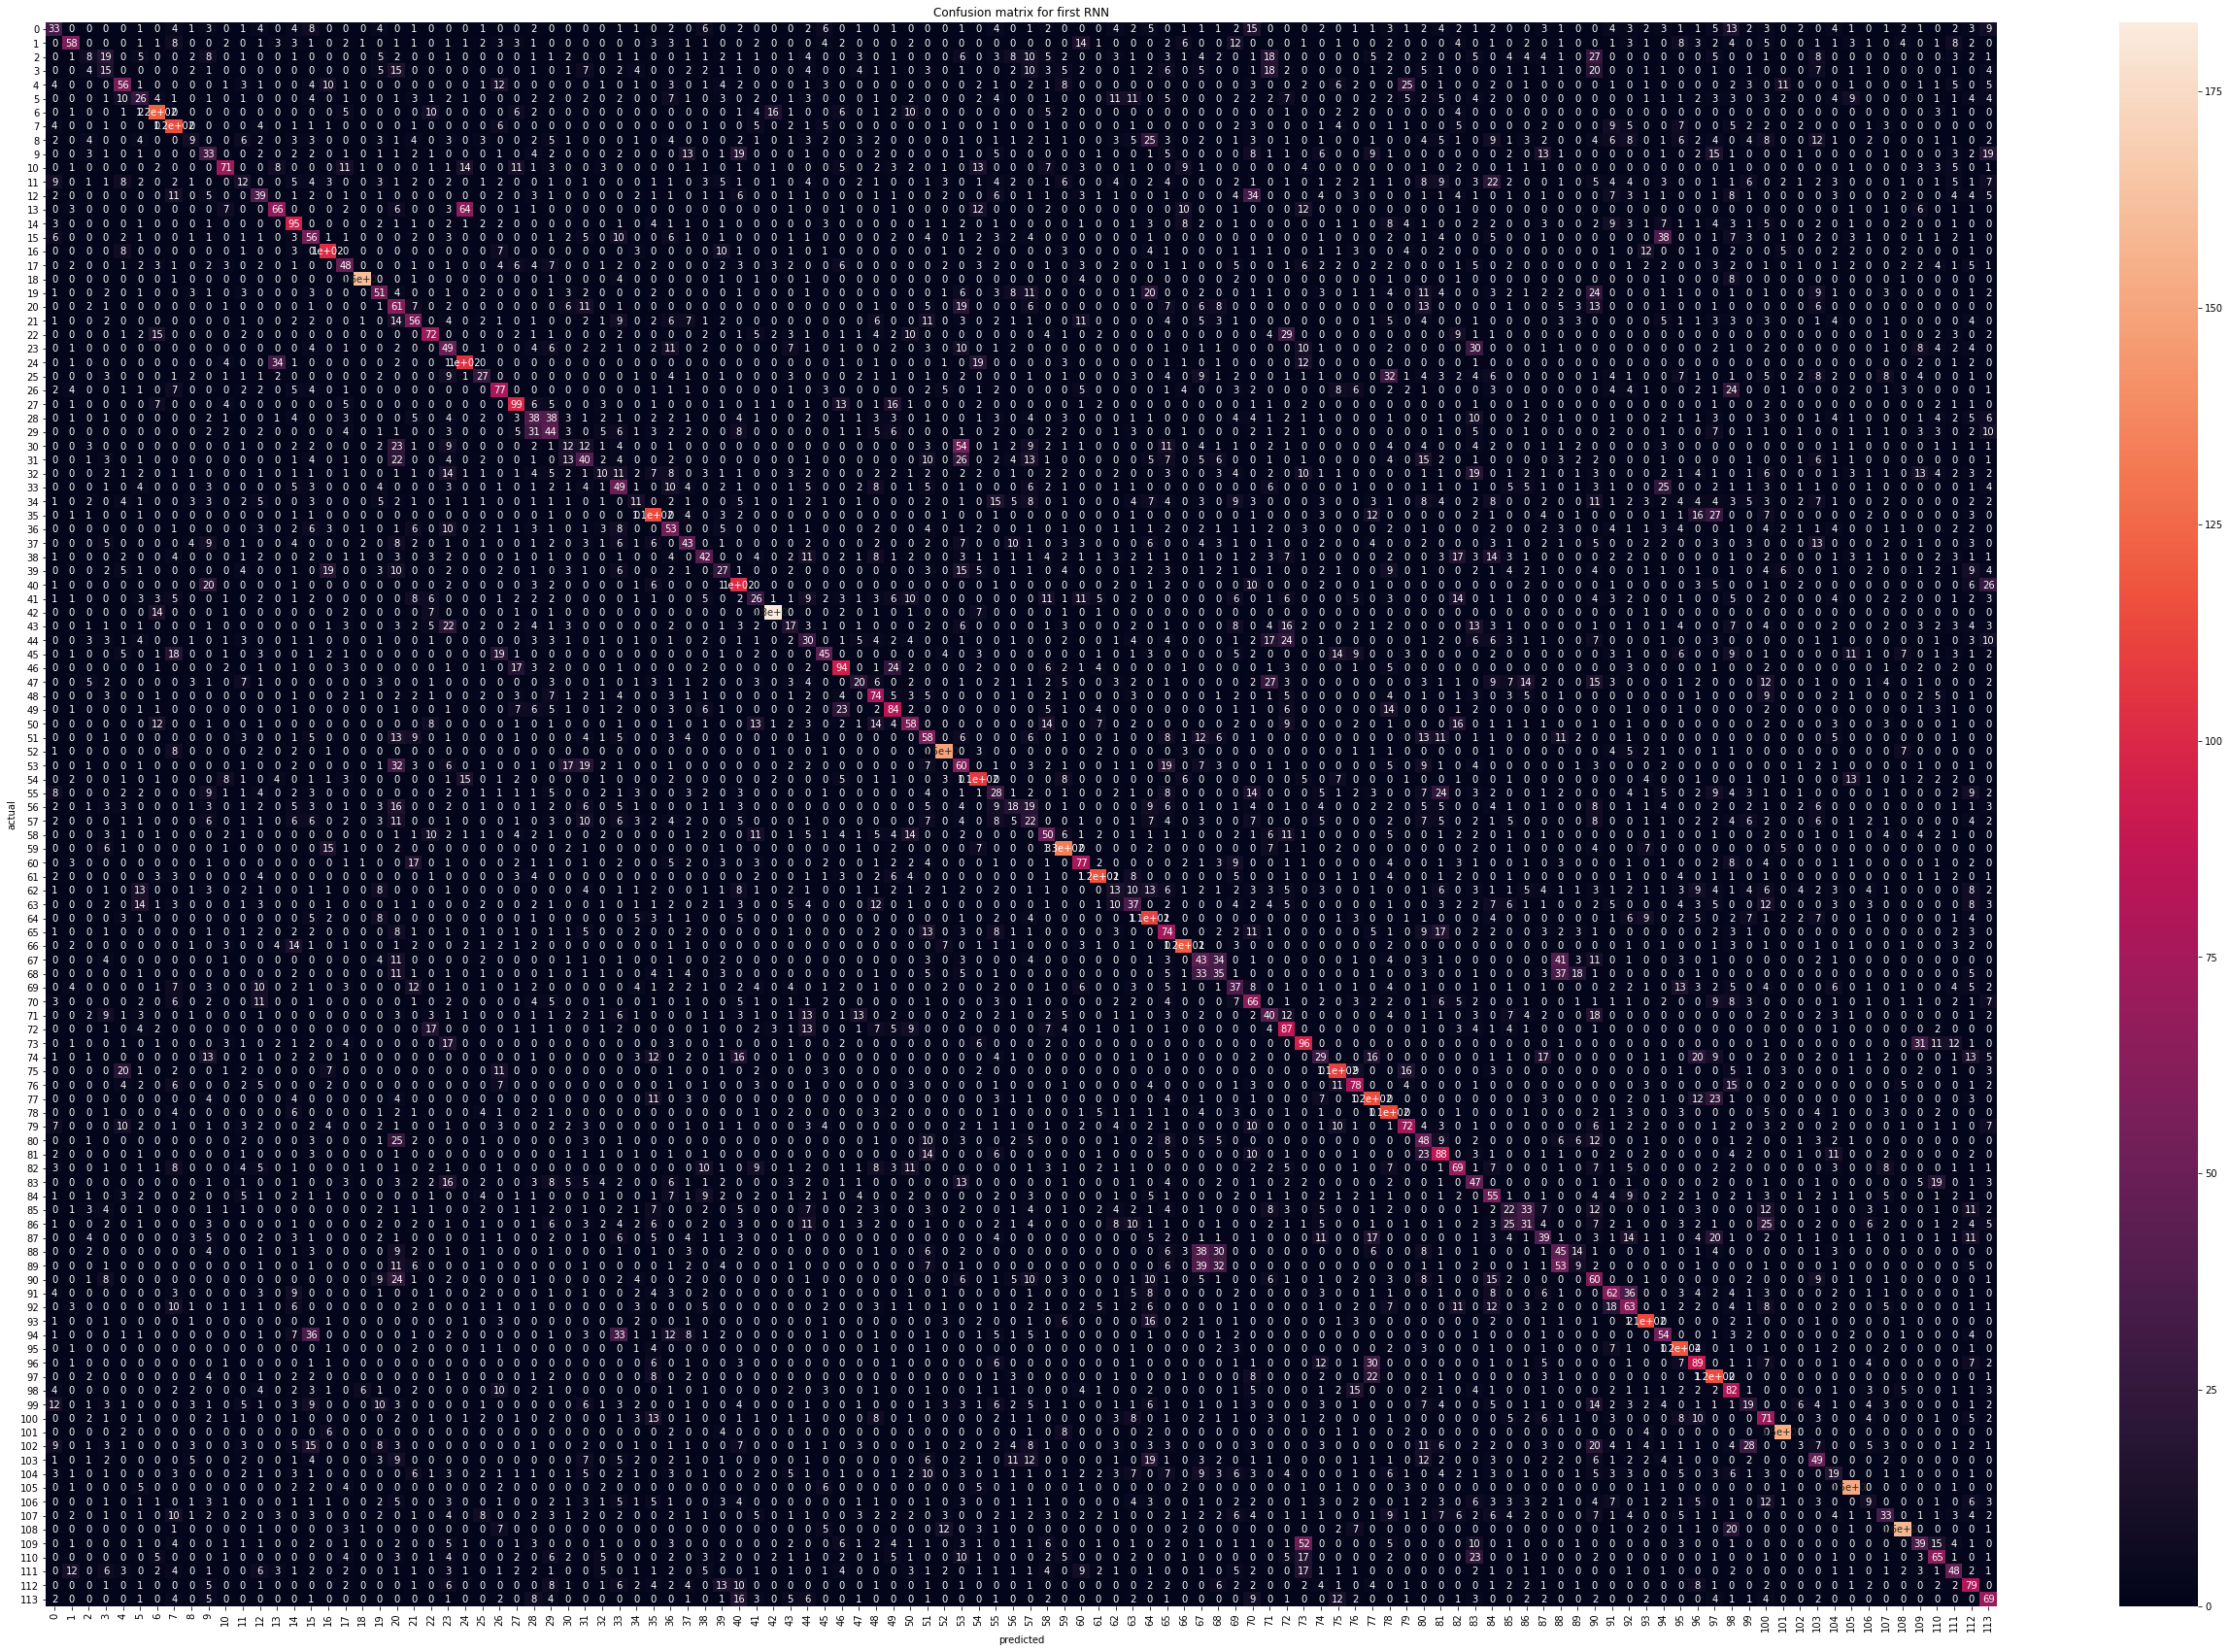

In [22]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(45,30))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix for first RNN')
plt.savefig('rnn1_conf_matrix.png')
plt.show()

In [23]:
model.save('DNN1net')

INFO:tensorflow:Assets written to: DNN1net\assets


### Hidden Dropout layer
Dropout performed in the second, hidden layer

In [24]:
model2 = keras.Sequential()
# first layer is a dense layer
model2.add(layers.Dense(100, input_shape=(15,), activation='relu'))
# add dropout layer
model2.add(layers.Dropout(0.2))
# second hidden layer is also dense
model2.add(layers.Dense(150, activation='relu'))
model2.add(layers.Dense(150, activation='relu'))
model2.add(layers.Dense(150, activation='relu'))
# last layer is the softmax layer for classification
model2.add(layers.Dense(114, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1600      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_8 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_9 (Dense)              (None, 114)               17214     
Total params: 79,264
Trainable params: 79,264
Non-trainable params: 0
__________________________________________________

In [25]:
checkpoint_path = "dnn2_training/cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [26]:
# Compile and train the model.
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2 = model2.fit(X_train,
                  y_train,
                  epochs=1000, 
                  batch_size=10000, 
                  validation_data=(X_val, y_val))

Epoch 1/1000
8/8 [==============================] - 1s 94ms/step - loss: 4.7306 - accuracy: 0.0140 - val_loss: 4.7126 - val_accuracy: 0.0223
Epoch 2/1000
8/8 [==============================] - 1s 91ms/step - loss: 4.6982 - accuracy: 0.0266 - val_loss: 4.6473 - val_accuracy: 0.0409
Epoch 3/1000
8/8 [==============================] - 1s 90ms/step - loss: 4.6038 - accuracy: 0.0372 - val_loss: 4.4762 - val_accuracy: 0.0474
Epoch 4/1000
8/8 [==============================] - 1s 96ms/step - loss: 4.4038 - accuracy: 0.0453 - val_loss: 4.2146 - val_accuracy: 0.0629
Epoch 5/1000
8/8 [==============================] - 1s 89ms/step - loss: 4.1904 - accuracy: 0.0663 - val_loss: 4.0327 - val_accuracy: 0.0943
Epoch 6/1000
8/8 [==============================] - 1s 90ms/step - loss: 4.0502 - accuracy: 0.0851 - val_loss: 3.9110 - val_accuracy: 0.1054
Epoch 7/1000
8/8 [==============================] - 1s 93ms/step - loss: 3.9447 - accuracy: 0.0943 - val_loss: 3.8162 - val_accuracy: 0.1203
Epoch 8/1000


Epoch 59/1000
8/8 [==============================] - 1s 82ms/step - loss: 3.0495 - accuracy: 0.2228 - val_loss: 2.9741 - val_accuracy: 0.2397
Epoch 60/1000
8/8 [==============================] - 1s 87ms/step - loss: 3.0451 - accuracy: 0.2241 - val_loss: 2.9703 - val_accuracy: 0.2410
Epoch 61/1000
8/8 [==============================] - 1s 89ms/step - loss: 3.0401 - accuracy: 0.2233 - val_loss: 2.9658 - val_accuracy: 0.2420
Epoch 62/1000
8/8 [==============================] - 1s 84ms/step - loss: 3.0341 - accuracy: 0.2249 - val_loss: 2.9598 - val_accuracy: 0.2412
Epoch 63/1000
8/8 [==============================] - 1s 86ms/step - loss: 3.0316 - accuracy: 0.2268 - val_loss: 2.9619 - val_accuracy: 0.2403
Epoch 64/1000
8/8 [==============================] - 1s 84ms/step - loss: 3.0264 - accuracy: 0.2264 - val_loss: 2.9501 - val_accuracy: 0.2441
Epoch 65/1000
8/8 [==============================] - 1s 90ms/step - loss: 3.0200 - accuracy: 0.2277 - val_loss: 2.9456 - val_accuracy: 0.2427
Epoch 

8/8 [==============================] - 1s 80ms/step - loss: 2.8822 - accuracy: 0.2497 - val_loss: 2.8179 - val_accuracy: 0.2610
Epoch 117/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.8781 - accuracy: 0.2488 - val_loss: 2.8149 - val_accuracy: 0.2662
Epoch 118/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.8799 - accuracy: 0.2512 - val_loss: 2.8110 - val_accuracy: 0.2656
Epoch 119/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.8728 - accuracy: 0.2499 - val_loss: 2.8103 - val_accuracy: 0.2641
Epoch 120/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.8727 - accuracy: 0.2540 - val_loss: 2.8116 - val_accuracy: 0.2662
Epoch 121/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.8733 - accuracy: 0.2502 - val_loss: 2.8044 - val_accuracy: 0.2660
Epoch 122/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.8701 - accuracy: 0.2540 - val_loss: 2.8031 - val_accuracy: 0.2677
Epoch 123/1000

8/8 [==============================] - 1s 88ms/step - loss: 2.7944 - accuracy: 0.2655 - val_loss: 2.7363 - val_accuracy: 0.2844
Epoch 174/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.7945 - accuracy: 0.2663 - val_loss: 2.7346 - val_accuracy: 0.2813
Epoch 175/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.7940 - accuracy: 0.2678 - val_loss: 2.7404 - val_accuracy: 0.2788
Epoch 176/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.7946 - accuracy: 0.2660 - val_loss: 2.7338 - val_accuracy: 0.2810
Epoch 177/1000
8/8 [==============================] - 1s 77ms/step - loss: 2.7903 - accuracy: 0.2667 - val_loss: 2.7374 - val_accuracy: 0.2836
Epoch 178/1000
8/8 [==============================] - 1s 87ms/step - loss: 2.7887 - accuracy: 0.2675 - val_loss: 2.7353 - val_accuracy: 0.2783
Epoch 179/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.7904 - accuracy: 0.2667 - val_loss: 2.7316 - val_accuracy: 0.2814
Epoch 180/1000

8/8 [==============================] - 1s 84ms/step - loss: 2.7313 - accuracy: 0.2791 - val_loss: 2.6853 - val_accuracy: 0.2901
Epoch 231/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.7291 - accuracy: 0.2774 - val_loss: 2.6812 - val_accuracy: 0.2923
Epoch 232/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.7273 - accuracy: 0.2781 - val_loss: 2.6829 - val_accuracy: 0.2934
Epoch 233/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.7294 - accuracy: 0.2775 - val_loss: 2.6807 - val_accuracy: 0.2939
Epoch 234/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.7253 - accuracy: 0.2797 - val_loss: 2.6843 - val_accuracy: 0.2913
Epoch 235/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.7261 - accuracy: 0.2806 - val_loss: 2.6825 - val_accuracy: 0.2919
Epoch 236/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.7234 - accuracy: 0.2790 - val_loss: 2.6810 - val_accuracy: 0.2912
Epoch 237/1000

8/8 [==============================] - 1s 85ms/step - loss: 2.6812 - accuracy: 0.2884 - val_loss: 2.6457 - val_accuracy: 0.3008
Epoch 288/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.6800 - accuracy: 0.2868 - val_loss: 2.6451 - val_accuracy: 0.3025
Epoch 289/1000
8/8 [==============================] - 1s 89ms/step - loss: 2.6770 - accuracy: 0.2900 - val_loss: 2.6433 - val_accuracy: 0.3021
Epoch 290/1000
8/8 [==============================] - 1s 95ms/step - loss: 2.6797 - accuracy: 0.2881 - val_loss: 2.6431 - val_accuracy: 0.2992
Epoch 291/1000
8/8 [==============================] - 1s 88ms/step - loss: 2.6775 - accuracy: 0.2898 - val_loss: 2.6414 - val_accuracy: 0.3011
Epoch 292/1000
8/8 [==============================] - 1s 88ms/step - loss: 2.6773 - accuracy: 0.2892 - val_loss: 2.6403 - val_accuracy: 0.3008
Epoch 293/1000
8/8 [==============================] - 1s 90ms/step - loss: 2.6722 - accuracy: 0.2899 - val_loss: 2.6384 - val_accuracy: 0.3016
Epoch 294/1000

8/8 [==============================] - 1s 81ms/step - loss: 2.6434 - accuracy: 0.2945 - val_loss: 2.6173 - val_accuracy: 0.3074
Epoch 345/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.6367 - accuracy: 0.2980 - val_loss: 2.6113 - val_accuracy: 0.3084
Epoch 346/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.6389 - accuracy: 0.2958 - val_loss: 2.6134 - val_accuracy: 0.3053
Epoch 347/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.6403 - accuracy: 0.2963 - val_loss: 2.6168 - val_accuracy: 0.3049
Epoch 348/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.6383 - accuracy: 0.2958 - val_loss: 2.6162 - val_accuracy: 0.3046
Epoch 349/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.6355 - accuracy: 0.2992 - val_loss: 2.6137 - val_accuracy: 0.3074
Epoch 350/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.6361 - accuracy: 0.2963 - val_loss: 2.6104 - val_accuracy: 0.3085
Epoch 351/1000

8/8 [==============================] - 1s 99ms/step - loss: 2.6039 - accuracy: 0.3043 - val_loss: 2.5916 - val_accuracy: 0.3092
Epoch 402/1000
8/8 [==============================] - 1s 85ms/step - loss: 2.6045 - accuracy: 0.3018 - val_loss: 2.5889 - val_accuracy: 0.3130
Epoch 403/1000
8/8 [==============================] - 1s 94ms/step - loss: 2.6062 - accuracy: 0.3023 - val_loss: 2.5897 - val_accuracy: 0.3114
Epoch 404/1000
8/8 [==============================] - 1s 87ms/step - loss: 2.6055 - accuracy: 0.3034 - val_loss: 2.5887 - val_accuracy: 0.3101
Epoch 405/1000
8/8 [==============================] - 1s 87ms/step - loss: 2.6047 - accuracy: 0.3030 - val_loss: 2.5897 - val_accuracy: 0.3118
Epoch 406/1000
8/8 [==============================] - 1s 87ms/step - loss: 2.6049 - accuracy: 0.3028 - val_loss: 2.5872 - val_accuracy: 0.3099
Epoch 407/1000
8/8 [==============================] - 1s 90ms/step - loss: 2.6066 - accuracy: 0.3022 - val_loss: 2.5865 - val_accuracy: 0.3095
Epoch 408/1000

8/8 [==============================] - 1s 85ms/step - loss: 2.5778 - accuracy: 0.3076 - val_loss: 2.5741 - val_accuracy: 0.3148
Epoch 459/1000
8/8 [==============================] - 1s 90ms/step - loss: 2.5817 - accuracy: 0.3067 - val_loss: 2.5729 - val_accuracy: 0.3158
Epoch 460/1000
8/8 [==============================] - 1s 94ms/step - loss: 2.5779 - accuracy: 0.3082 - val_loss: 2.5663 - val_accuracy: 0.3184
Epoch 461/1000
8/8 [==============================] - 1s 94ms/step - loss: 2.5782 - accuracy: 0.3076 - val_loss: 2.5704 - val_accuracy: 0.3145
Epoch 462/1000
8/8 [==============================] - 1s 117ms/step - loss: 2.5770 - accuracy: 0.3075 - val_loss: 2.5730 - val_accuracy: 0.3169
Epoch 463/1000
8/8 [==============================] - 1s 102ms/step - loss: 2.5802 - accuracy: 0.3071 - val_loss: 2.5689 - val_accuracy: 0.3156
Epoch 464/1000
8/8 [==============================] - 1s 90ms/step - loss: 2.5762 - accuracy: 0.3072 - val_loss: 2.5663 - val_accuracy: 0.3154
Epoch 465/10

8/8 [==============================] - 1s 83ms/step - loss: 2.5544 - accuracy: 0.3115 - val_loss: 2.5556 - val_accuracy: 0.3185
Epoch 516/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.5492 - accuracy: 0.3132 - val_loss: 2.5540 - val_accuracy: 0.3152
Epoch 517/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.5551 - accuracy: 0.3129 - val_loss: 2.5492 - val_accuracy: 0.3200
Epoch 518/1000
8/8 [==============================] - 1s 85ms/step - loss: 2.5512 - accuracy: 0.3126 - val_loss: 2.5535 - val_accuracy: 0.3181
Epoch 519/1000
8/8 [==============================] - 1s 82ms/step - loss: 2.5492 - accuracy: 0.3124 - val_loss: 2.5520 - val_accuracy: 0.3190
Epoch 520/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.5491 - accuracy: 0.3136 - val_loss: 2.5513 - val_accuracy: 0.3190
Epoch 521/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.5468 - accuracy: 0.3125 - val_loss: 2.5542 - val_accuracy: 0.3194
Epoch 522/1000

8/8 [==============================] - 1s 84ms/step - loss: 2.5294 - accuracy: 0.3169 - val_loss: 2.5404 - val_accuracy: 0.3203
Epoch 573/1000
8/8 [==============================] - 1s 92ms/step - loss: 2.5288 - accuracy: 0.3154 - val_loss: 2.5395 - val_accuracy: 0.3195
Epoch 574/1000
8/8 [==============================] - 1s 93ms/step - loss: 2.5307 - accuracy: 0.3165 - val_loss: 2.5402 - val_accuracy: 0.3208
Epoch 575/1000
8/8 [==============================] - 1s 95ms/step - loss: 2.5255 - accuracy: 0.3182 - val_loss: 2.5400 - val_accuracy: 0.3210
Epoch 576/1000
8/8 [==============================] - 1s 96ms/step - loss: 2.5292 - accuracy: 0.3172 - val_loss: 2.5399 - val_accuracy: 0.3204
Epoch 577/1000
8/8 [==============================] - 1s 99ms/step - loss: 2.5245 - accuracy: 0.3188 - val_loss: 2.5373 - val_accuracy: 0.3195
Epoch 578/1000
8/8 [==============================] - 1s 104ms/step - loss: 2.5256 - accuracy: 0.3175 - val_loss: 2.5356 - val_accuracy: 0.3216
Epoch 579/100

8/8 [==============================] - 1s 80ms/step - loss: 2.5105 - accuracy: 0.3202 - val_loss: 2.5288 - val_accuracy: 0.3225
Epoch 630/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.5093 - accuracy: 0.3217 - val_loss: 2.5323 - val_accuracy: 0.3228
Epoch 631/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.5061 - accuracy: 0.3206 - val_loss: 2.5320 - val_accuracy: 0.3220
Epoch 632/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.5068 - accuracy: 0.3209 - val_loss: 2.5295 - val_accuracy: 0.3215
Epoch 633/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.5046 - accuracy: 0.3203 - val_loss: 2.5306 - val_accuracy: 0.3216
Epoch 634/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.5060 - accuracy: 0.3210 - val_loss: 2.5287 - val_accuracy: 0.3228
Epoch 635/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.5078 - accuracy: 0.3202 - val_loss: 2.5266 - val_accuracy: 0.3207
Epoch 636/1000

8/8 [==============================] - 1s 80ms/step - loss: 2.4943 - accuracy: 0.3224 - val_loss: 2.5147 - val_accuracy: 0.3251
Epoch 687/1000
8/8 [==============================] - 1s 85ms/step - loss: 2.4859 - accuracy: 0.3251 - val_loss: 2.5237 - val_accuracy: 0.3239
Epoch 688/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4920 - accuracy: 0.3239 - val_loss: 2.5230 - val_accuracy: 0.3223
Epoch 689/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4910 - accuracy: 0.3224 - val_loss: 2.5208 - val_accuracy: 0.3234
Epoch 690/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4899 - accuracy: 0.3250 - val_loss: 2.5171 - val_accuracy: 0.3244
Epoch 691/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4879 - accuracy: 0.3245 - val_loss: 2.5172 - val_accuracy: 0.3252
Epoch 692/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.4856 - accuracy: 0.3235 - val_loss: 2.5206 - val_accuracy: 0.3234
Epoch 693/1000

8/8 [==============================] - 1s 77ms/step - loss: 2.4688 - accuracy: 0.3284 - val_loss: 2.5118 - val_accuracy: 0.3254
Epoch 744/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.4705 - accuracy: 0.3271 - val_loss: 2.5097 - val_accuracy: 0.3262
Epoch 745/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4724 - accuracy: 0.3261 - val_loss: 2.5136 - val_accuracy: 0.3244
Epoch 746/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4678 - accuracy: 0.3280 - val_loss: 2.5053 - val_accuracy: 0.3260
Epoch 747/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.4718 - accuracy: 0.3295 - val_loss: 2.5102 - val_accuracy: 0.3263
Epoch 748/1000
8/8 [==============================] - 1s 73ms/step - loss: 2.4739 - accuracy: 0.3267 - val_loss: 2.5090 - val_accuracy: 0.3280
Epoch 749/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4693 - accuracy: 0.3264 - val_loss: 2.5105 - val_accuracy: 0.3244
Epoch 750/1000

8/8 [==============================] - 1s 81ms/step - loss: 2.4536 - accuracy: 0.3312 - val_loss: 2.5036 - val_accuracy: 0.3268
Epoch 801/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4574 - accuracy: 0.3290 - val_loss: 2.5018 - val_accuracy: 0.3279
Epoch 802/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4543 - accuracy: 0.3304 - val_loss: 2.5039 - val_accuracy: 0.3272
Epoch 803/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4527 - accuracy: 0.3326 - val_loss: 2.4995 - val_accuracy: 0.3294
Epoch 804/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.4534 - accuracy: 0.3294 - val_loss: 2.5042 - val_accuracy: 0.3271
Epoch 805/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.4526 - accuracy: 0.3298 - val_loss: 2.4985 - val_accuracy: 0.3296
Epoch 806/1000
8/8 [==============================] - 1s 81ms/step - loss: 2.4528 - accuracy: 0.3310 - val_loss: 2.5032 - val_accuracy: 0.3279
Epoch 807/1000

8/8 [==============================] - 1s 118ms/step - loss: 2.4412 - accuracy: 0.3334 - val_loss: 2.4952 - val_accuracy: 0.3300
Epoch 858/1000
8/8 [==============================] - 1s 117ms/step - loss: 2.4389 - accuracy: 0.3331 - val_loss: 2.4924 - val_accuracy: 0.3302
Epoch 859/1000
8/8 [==============================] - 1s 109ms/step - loss: 2.4413 - accuracy: 0.3337 - val_loss: 2.4927 - val_accuracy: 0.3301
Epoch 860/1000
8/8 [==============================] - 1s 113ms/step - loss: 2.4399 - accuracy: 0.3324 - val_loss: 2.4941 - val_accuracy: 0.3288
Epoch 861/1000
8/8 [==============================] - 1s 107ms/step - loss: 2.4385 - accuracy: 0.3325 - val_loss: 2.4931 - val_accuracy: 0.3318
Epoch 862/1000
8/8 [==============================] - 1s 106ms/step - loss: 2.4349 - accuracy: 0.3337 - val_loss: 2.4964 - val_accuracy: 0.3295
Epoch 863/1000
8/8 [==============================] - 1s 122ms/step - loss: 2.4388 - accuracy: 0.3319 - val_loss: 2.4967 - val_accuracy: 0.3288
Epoch 8

8/8 [==============================] - 1s 88ms/step - loss: 2.4239 - accuracy: 0.3347 - val_loss: 2.4869 - val_accuracy: 0.3320
Epoch 915/1000
8/8 [==============================] - 1s 84ms/step - loss: 2.4236 - accuracy: 0.3357 - val_loss: 2.4914 - val_accuracy: 0.3317
Epoch 916/1000
8/8 [==============================] - 1s 83ms/step - loss: 2.4217 - accuracy: 0.3350 - val_loss: 2.4870 - val_accuracy: 0.3319
Epoch 917/1000
8/8 [==============================] - 1s 89ms/step - loss: 2.4201 - accuracy: 0.3369 - val_loss: 2.4889 - val_accuracy: 0.3308
Epoch 918/1000
8/8 [==============================] - 1s 86ms/step - loss: 2.4197 - accuracy: 0.3351 - val_loss: 2.4855 - val_accuracy: 0.3315
Epoch 919/1000
8/8 [==============================] - 1s 85ms/step - loss: 2.4184 - accuracy: 0.3374 - val_loss: 2.4870 - val_accuracy: 0.3307
Epoch 920/1000
8/8 [==============================] - 1s 87ms/step - loss: 2.4175 - accuracy: 0.3359 - val_loss: 2.4888 - val_accuracy: 0.3301
Epoch 921/1000

8/8 [==============================] - 1s 79ms/step - loss: 2.4065 - accuracy: 0.3391 - val_loss: 2.4840 - val_accuracy: 0.3323
Epoch 972/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4058 - accuracy: 0.3390 - val_loss: 2.4824 - val_accuracy: 0.3322
Epoch 973/1000
8/8 [==============================] - 1s 77ms/step - loss: 2.4100 - accuracy: 0.3379 - val_loss: 2.4824 - val_accuracy: 0.3319
Epoch 974/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4087 - accuracy: 0.3384 - val_loss: 2.4819 - val_accuracy: 0.3332
Epoch 975/1000
8/8 [==============================] - 1s 80ms/step - loss: 2.4098 - accuracy: 0.3398 - val_loss: 2.4838 - val_accuracy: 0.3323
Epoch 976/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.4116 - accuracy: 0.3374 - val_loss: 2.4836 - val_accuracy: 0.3306
Epoch 977/1000
8/8 [==============================] - 1s 79ms/step - loss: 2.4107 - accuracy: 0.3380 - val_loss: 2.4800 - val_accuracy: 0.3323
Epoch 978/1000

plot learning curves

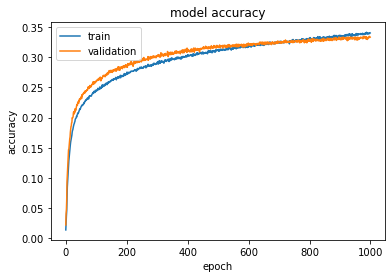

In [27]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

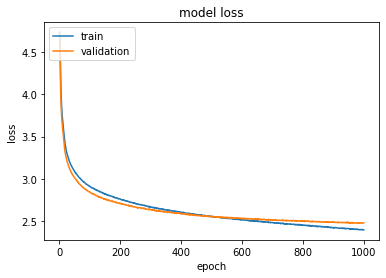

In [28]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_accuracy)

710/710 [==============================] - 1s 1ms/step - loss: 2.5189 - accuracy: 0.3225
test loss: 2.5188825130462646
test accuracy: 0.32245707511901855


In [30]:
#predictions
y_pred2 = model2.predict(X_test)

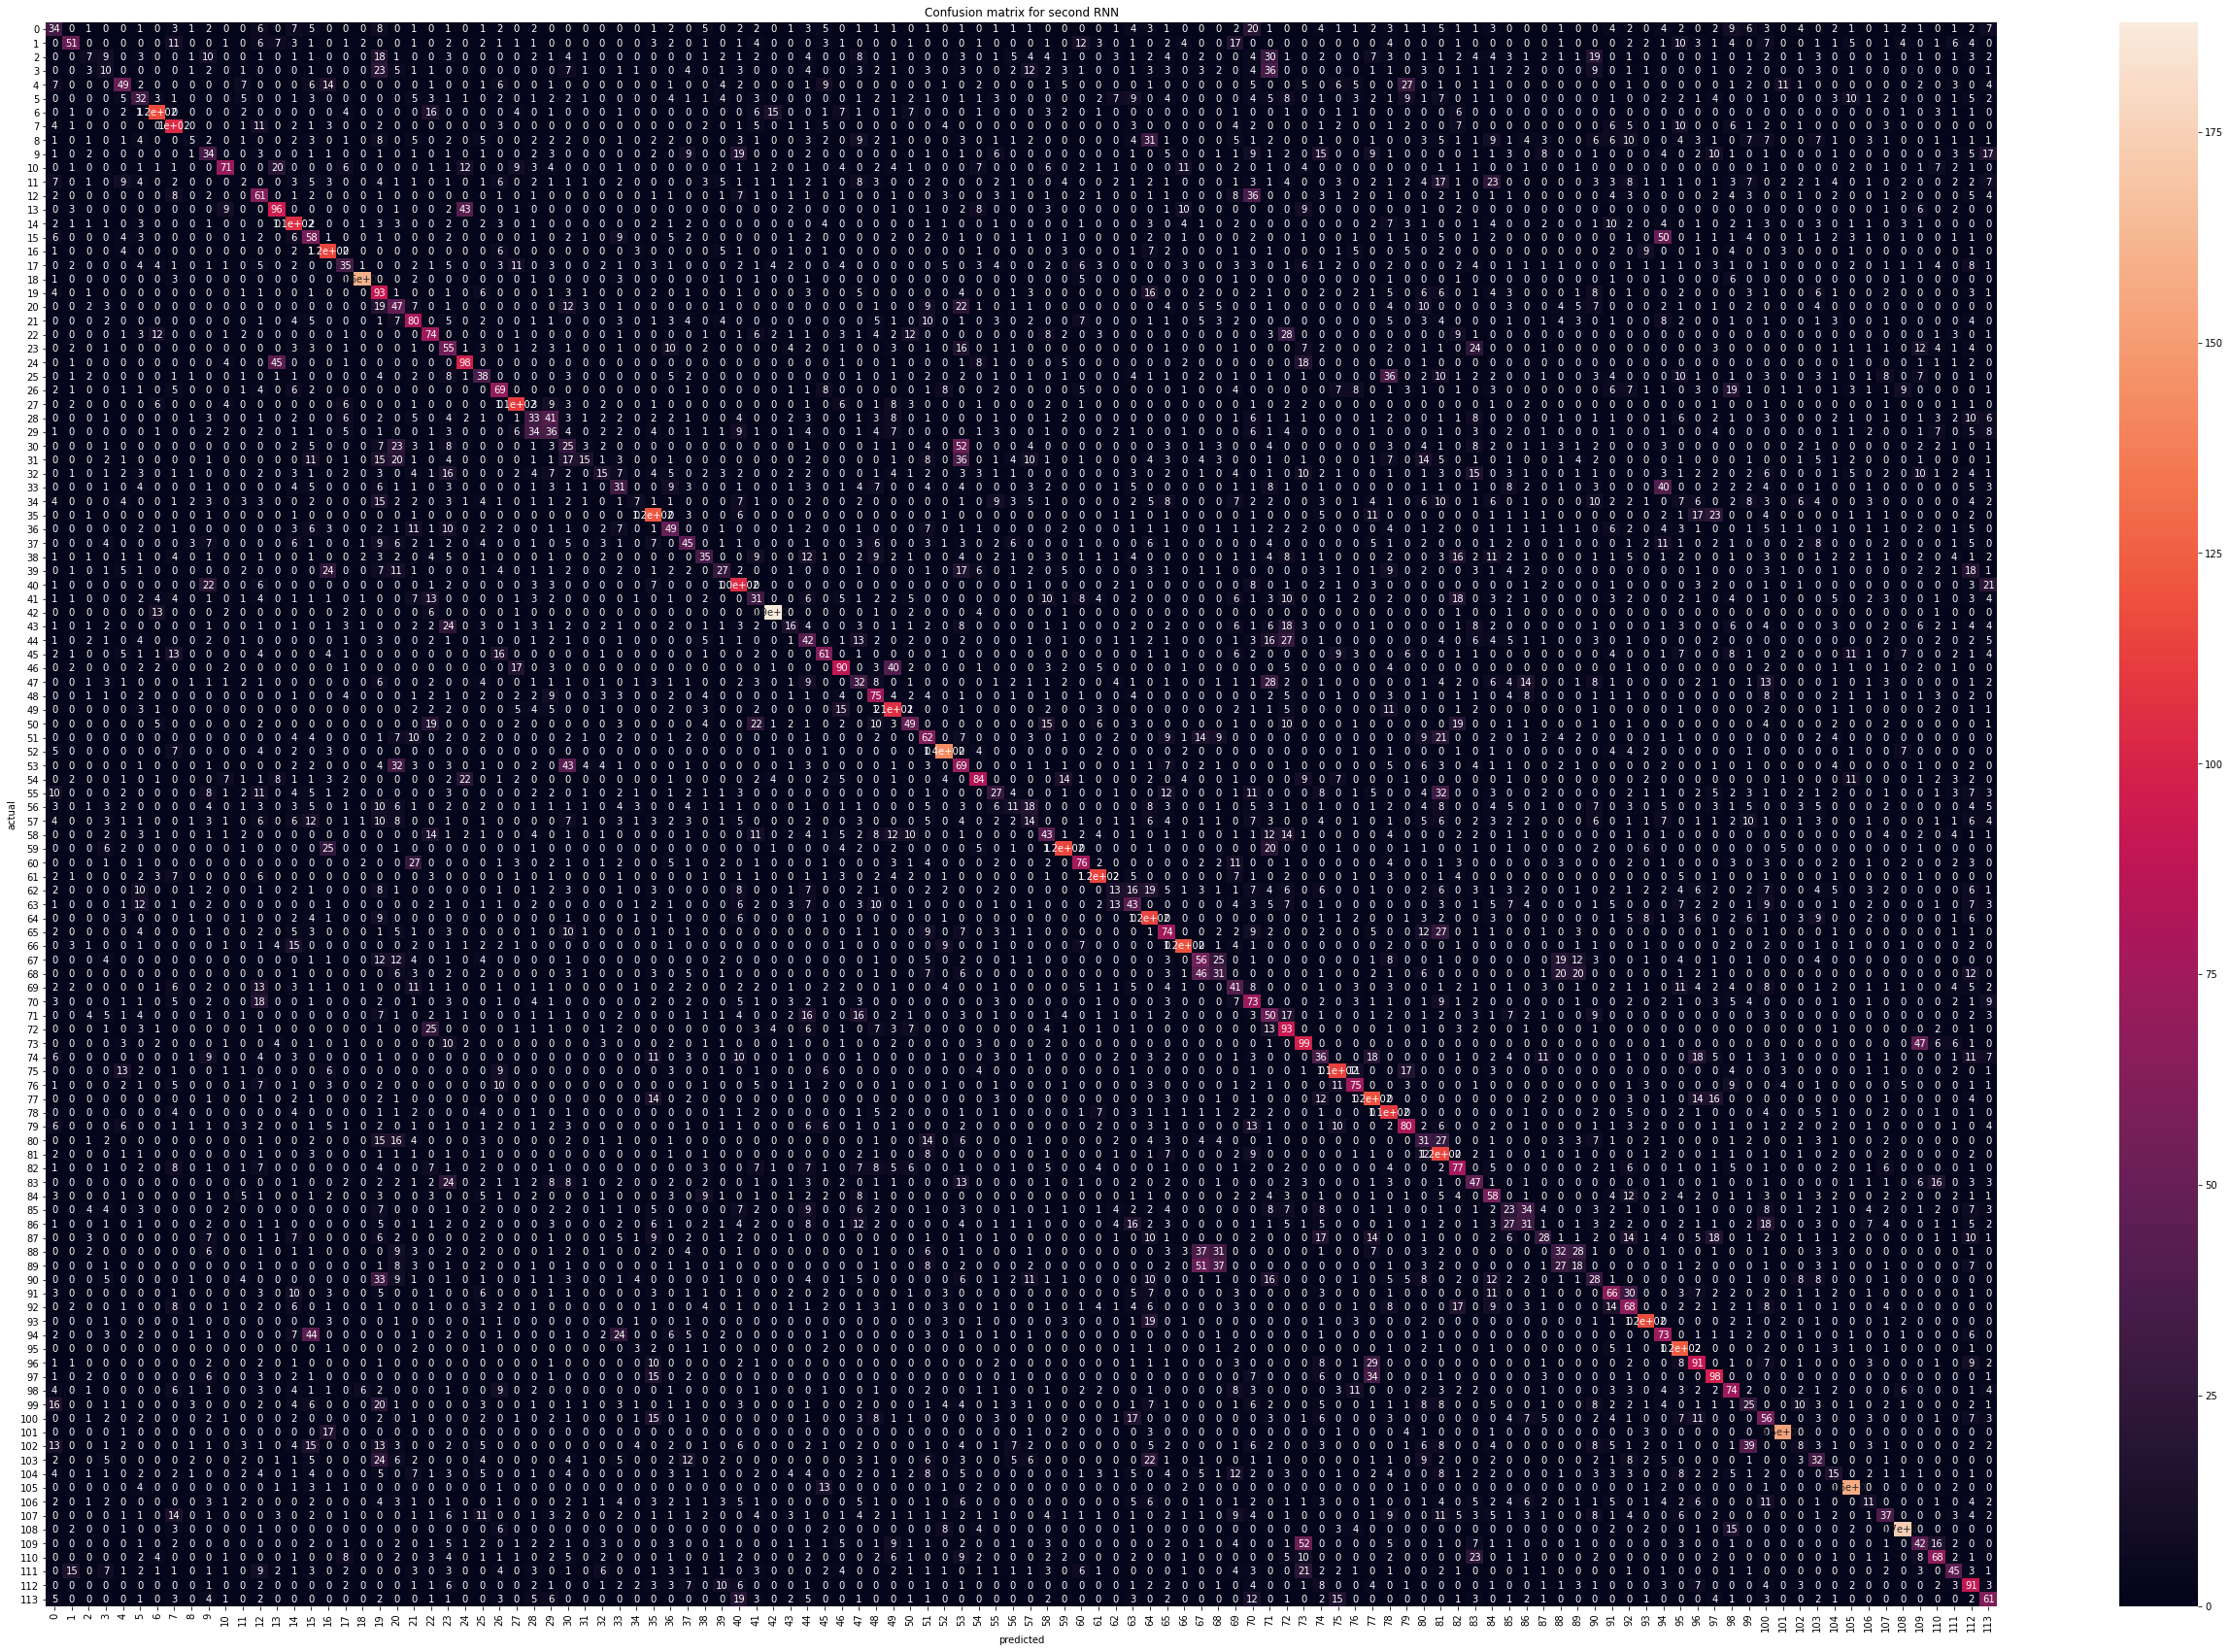

In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(45,30))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1)),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix for second RNN')
plt.savefig('rnn2_conf_matrix.png')
plt.show()

In [32]:
model2.save('DNN2net')

INFO:tensorflow:Assets written to: DNN2net\assets
